In [2]:
#IMPORT ALL DATA
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
test_x=test.drop('PassengerId',1) #is this actually working?
train_x=train.drop('PassengerId',1)
test_x=test.drop('Ticket',1)
train_x=train.drop('Ticket',1)

In [3]:
#FIND THE MEDIAN AGE AND REPLACE BLANK VALUES WITH IT
median_age=np.median(train_x['Age'].dropna())
train_x['Age']=train_x['Age'].fillna(median_age)
median_age=np.median(test_x['Age'].dropna())
test_x['Age']=test_x['Age'].fillna(median_age)

In [4]:
#SET CABIN TO BINARY FEATURE
train_x.loc[train_x['Cabin'].isnull(), 'Cabin'] = 0
train_x.loc[train_x['Cabin'] != 0, 'Cabin'] = 1
test_x.loc[test_x['Cabin'].isnull(), 'Cabin'] = 0
test_x.loc[test_x['Cabin'] != 0, 'Cabin'] = 1

In [5]:
#SET MISSING EMBARKED VALUES TO THE MOST COMMON ONE
train_x['Embarked']=train_x['Embarked'].fillna('S')
test_x['Embarked']=test_x['Embarked'].fillna('S')

In [6]:
#USE VALUES INSTEAD OF TEXT IN EMBARKED?
train_x['Embarked']=train_x['Embarked'].replace({'S': 0, 'C': 1, 'Q':2})
test_x['Embarked']=test_x['Embarked'].replace({'S': 0, 'C': 1, 'Q':2})

In [7]:
#CHANGE MISSING FARE VALUES TO THE MEDIAN VALUE
test_x['Fare'] = test_x['Fare'].fillna(test_x['Fare'].dropna().median())

In [8]:
#REPLACE MALE AND FEMALES WITH NUMBERS?
train_x['Sex']=train_x['Sex'].replace('male',0)
train_x['Sex']=train_x['Sex'].replace('female',1)
test_x['Sex']=test_x['Sex'].replace('male',0)
test_x['Sex']=test_x['Sex'].replace('female',1)

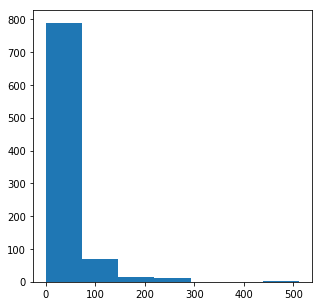

In [9]:
#CONVERT FARE VALUES TO DISCRETE CATEGORIES
fig = plt.figure(figsize=(5,5))
ax1=fig.add_subplot(1,1,1)
values=ax1.hist(train_x['Fare'], bins=7)
for i in range(1,len(values[1])):
    train_x.loc[(train_x['Fare'] < values[1][i]) & (train_x['Fare'] >= values[1][i-1]),'Fare'] = i-1
    test_x.loc[(test_x['Fare'] < values[1][i]) & (test_x['Fare'] >= values[1][i-1]),'Fare'] = i-1

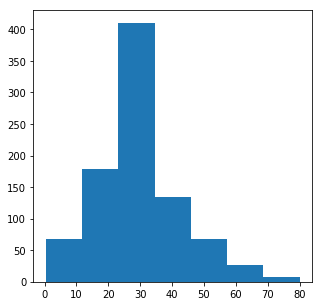

In [10]:
#CONVERT FARE VALUES TO DISCRETE CATEGORIES
fig = plt.figure(figsize=(5,5))
ax1=fig.add_subplot(1,1,1)
values=ax1.hist(train_x['Age'], bins=7)
for i in range(1,len(values[1])):
    train_x.loc[(train_x['Age'] < values[1][i]) & (train_x['Age'] >= values[1][i-1]),'Age'] = i-1
    test_x.loc[(test_x['Age'] < values[1][i]) & (test_x['Age'] >= values[1][i-1]),'Age'] = i-1

In [11]:
#REDUCE THE NUMBER OF TITLES IN THE DATASET
names = list(train_x['Name'])
names_test=list(test_x['Name'])

titles=[]
for name in names:
    tmp=name.split(',')
    tmp=tmp[1].split('.')
    titles.append(tmp[0].strip())
    
titles_test=[]
for name in names_test:
    tmp=name.split(',')
    tmp=tmp[1].split('.')
    titles_test .append(tmp[0].strip()) 
    
train_x['Titles']=titles
test_x['Titles']=titles_test

print(train_x['Titles'].unique())
print(test_x['Titles'].unique())

train_x['Titles']=train_x['Titles'].replace({'Mme': 'Mrs', 'Ms': 'Miss', 'Mlle':'Miss',
                                              'Don':'Other'
                                            , 'Rev':'Other'
                                             , 'Dr':'Other'
                                             , 'Major':'Other'
                                             , 'Lady':'Other'
                                             , 'Sir':'Other'
                                             , 'Col':'Other'
                                             , 'Capt':'Other'
                                             , 'the Countess':'Other'
                                             , 'Jonkheer':'Other'
                                            
                                            })


test_x['Titles']=test_x['Titles'].replace({'Mme': 'Mrs', 'Ms': 'Miss', 'Mlle':'Miss',
                                              'Dona':'Other'
                                            , 'Rev':'Other'
                                             , 'Dr':'Other'
                                             , 'Major':'Other'
                                             , 'Lady':'Other'
                                             , 'Sir':'Other'
                                             , 'Col':'Other'
                                             , 'Capt':'Other'
                                             , 'the Countess':'Other'
                                             , 'Jonkheer':'Other'
                                            
                                            })

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [12]:
#ONE HOT ENCODE THE SEX VALUES
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.preprocessing import  LabelEncoder as LE

sex= [['male'], ['female']]
enc = LE()
enc.fit(train_x['Sex'])
new_sex = enc.transform(train_x['Sex'])
new_sex = new_sex.reshape(-1, 1) # Needs to be the correct shape
ohe = OHE(sparse=False) #Easier to read
encoded_sex=ohe.fit_transform(new_sex)

enc.fit(test_x['Sex'])
new_sex_test = enc.transform(test_x['Sex'])
new_sex_test = new_sex_test.reshape(-1, 1) # Needs to be the correct shape
ohe = OHE(sparse=False) #Easier to read
encoded_sex_test=ohe.fit_transform(new_sex_test)
encoded_sex_test.shape

(418, 2)

In [13]:
#ONE HOT ENCODE THE EMBARKED VALUES
embarked= [['S'], ['C'],['Q']]
enc = LE()
enc.fit(train_x['Embarked'])
new_embarked = enc.transform(train_x['Embarked'])
new_embarked = new_embarked.reshape(-1, 1) # Needs to be the correct shape
ohe = OHE(sparse=False) #Easier to read
encoded_embarked=ohe.fit_transform(new_embarked)

enc.fit(test_x['Embarked'])
new_embarked_test = enc.transform(test_x['Embarked'])
new_embarked_test = new_embarked_test.reshape(-1, 1) # Needs to be the correct shape
ohe = OHE(sparse=False) #Easier to read
encoded_embarked_test=ohe.fit_transform(new_embarked_test)

In [14]:
#ONE HOT ENCODE TITLE VALUES
Titles= [['Mrs'], ['Mr'],['Miss'],['Other']]
enc = LE()
enc.fit(train_x['Titles'])
new_Titles = enc.transform(train_x['Titles'])
new_Titles = new_Titles.reshape(-1, 1) # Needs to be the correct shape
ohe = OHE(sparse=False) #Easier to read
encoded_Titles=ohe.fit_transform(new_Titles)

enc.fit(test_x['Titles'])
new_Titles_test = enc.transform(test_x['Titles'])
new_Titles_test = new_Titles_test.reshape(-1, 1) # Needs to be the correct shape
ohe = OHE(sparse=False) #Easier to read
encoded_Titles_test=ohe.fit_transform(new_Titles_test)

In [15]:
#ONE HOT ENCODE CLASS VALUES
Pclass= [[3], [1],[2]]
enc = LE()
enc.fit(Pclass)
new_Pclass = enc.transform(train_x['Pclass'])
new_Pclass = new_Pclass.reshape(-1, 1) # Needs to be the correct shape
ohe = OHE(sparse=False) #Easier to read
encoded_Pclass=ohe.fit_transform(new_Pclass)

enc.fit(Pclass)
new_Pclass_test = enc.transform(test_x['Pclass'])
new_Pclass_test = new_Pclass_test.reshape(-1, 1) # Needs to be the correct shape
ohe = OHE(sparse=False) #Easier to read
encoded_Pclass_test=ohe.fit_transform(new_Pclass_test)

C:\Users\Mark\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
#CREATE A NEW DATAFRAME WITH THE BINNED AND ONE HOT ENCODED VALUES
encoded_data=train_x.drop(['Sex','Titles','Embarked','Pclass'],1)
encoded_data_test=test_x.drop(['Sex','Titles','Embarked','Pclass'],1)

encoded_data['Female']=encoded_sex[:,0]
encoded_data['Male']=encoded_sex[:,1]
encoded_data['Mrs']=encoded_Titles[:,3]
encoded_data['Mr']=encoded_Titles[:,2]
encoded_data['Miss']=encoded_Titles[:,1]
encoded_data['Other']=encoded_Titles[:,0]
encoded_data['C']=encoded_embarked[:,0]
encoded_data['Q']=encoded_embarked[:,1]
encoded_data['S']=encoded_embarked[:,2]
encoded_data['1']=encoded_Pclass[:,0]
encoded_data['2']=encoded_Pclass[:,1]
encoded_data['3']=encoded_Pclass[:,2]

encoded_data_test['Female']=encoded_sex_test[:,0]
encoded_data_test['Male']=encoded_sex_test[:,1]
encoded_data_test['Mrs']=encoded_Titles_test[:,3]
encoded_data_test['Mr']=encoded_Titles_test[:,2]
encoded_data_test['Miss']=encoded_Titles_test[:,1]
encoded_data_test['Other']=encoded_Titles_test[:,0]
encoded_data_test['C']=encoded_embarked_test[:,0]
encoded_data_test['Q']=encoded_embarked_test[:,1]
encoded_data_test['S']=encoded_embarked_test[:,2]
encoded_data_test['1']=encoded_Pclass_test[:,0]
encoded_data_test['2']=encoded_Pclass_test[:,1]
encoded_data_test['3']=encoded_Pclass_test[:,2]

In [17]:
#REMOVE THE PASSENGERID COLUMN
encoded_data_test = encoded_data_test.drop('PassengerId',1)
encoded_data = encoded_data.drop('PassengerId',1)

In [19]:
#LOGISTIC REGRESSION WITH GRIDSEARCH
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV as GS
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

parameters = {'penalty':['l1','l2'],
              'fit_intercept':[True,False],
              'C':[0.1,1,10,20,50,100,500,1000]}

gs = GS(estimator=LogisticRegression(random_state=9999), param_grid=parameters,n_jobs=4,verbose=True,cv=8)
gs.fit(encoded_data.drop(['Survived','Name'],1), encoded_data['Survived'])
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 8 folds for each of 32 candidates, totalling 256 fits


[Parallel(n_jobs=4)]: Done  50 tasks      | elapsed:    6.7s


Best score: 0.828
Best parameters set:
	C: 1
	fit_intercept: True
	penalty: 'l2'


[Parallel(n_jobs=4)]: Done 256 out of 256 | elapsed:    8.4s finished


In [26]:
encoded_data.corr()

,Survived,Age,SibSp,Parch,Fare,Female,Male,Mrs,Mr,Miss,Other,C,Q,S,1,2,3
Survived,1.000000,0.018445,-0.035322,0.081629,0.077097,-0.543351,0.543351,0.341994,-0.549199,0.335636,0.085221,-0.149683,0.168240,0.003650,0.285904,0.093349,-0.322308
Age,0.018445,1.000000,-0.101438,-0.077120,0.017716,0.051830,-0.051830,0.055069,0.092554,-0.111789,-0.146515,0.009162,0.005389,-0.022060,0.188249,-0.010775,-0.153427
SibSp,-0.035322,-0.101438,1.000000,0.414838,-0.026599,-0.114631,0.114631,0.061668,-0.250489,0.083462,0.349559,0.068734,-0.059528,-0.026354,-0.054582,-0.055932,0.092548
Parch,0.081629,-0.077120,0.414838,1.000000,-0.001061,-0.245489,0.245489,0.223575,-0.333905,0.100998,0.267344,0.060814,-0.011069,-0.081228,-0.017633,-0.000734,0.015790
Fare,0.077097,0.017716,-0.026599,-0.001061,1.000000,-0.000818,0.000818,-0.021943,0.007403,0.020247,-0.013021,-0.096812,0.124331,-0.019239,0.111686,-0.031891,-0.070274
Female,-0.543351,0.051830,-0.114631,-0.245489,-0.000818,1.000000,-1.000000,-0.550146,0.867334,-0.693916,0.159934,0.119224,-0.082853,-0.074115,-0.098013,-0.064746,0.137143
Male,0.543351,-0.051830,0.114631,0.245489,0.000818,-1.000000,1.000000,0.550146,-0.867334,0.693916,-0.159934,-0.119224,0.082853,0.074115,0.098013,0.064746,-0.137143
Mrs,0.341994,0.055069,0.061668,0.223575,-0.021943,-0.550146,0.550146,1.000000,-0.477160,-0.207749,-0.087987,-0.002550,0.067872,-0.090432,0.093608,0.119193,-0.177658
Mr,-0.549199,0.092554,-0.250489,-0.333905,0.007403,0.867334,-0.867334,-0.477160,1.000000,-0.601857,-0.254903,0.112870,-0.072567,-0.078338,-0.097288,-0.088569,0.155907
Miss,0.335636,-0.111789,0.083462,0.100998,0.020247,-0.693916,0.693916,-0.207749,-0.601857,1.000000,-0.110981,-0.137144,0.036204,0.167531,0.020348,-0.021903,0.000293


In [20]:
#CROSS VALIDATION WITH FEATURE REMOVAL
log_reg = LogisticRegression(C=1, fit_intercept=True, penalty="l2")
new_c=encoded_data.drop(['Survived','Name'],1)
scores = cross_val_score(log_reg, encoded_data.drop(['Survived','Name'],1), encoded_data['Survived'], cv=8)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(log_reg, new_c.drop(new_c.columns[i],1), encoded_data['Survived'], cv=8)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.828410919036
Cross-validated scores without:  Age 0.825032540658
Cross-validated scores without:  SibSp 0.823906048906
Cross-validated scores without:  Parch 0.817077995203
Cross-validated scores without:  Fare 0.828390626828
Cross-validated scores without:  Cabin 0.824961426524
Cross-validated scores without:  Female 0.828410919036
Cross-validated scores without:  Male 0.828410919036
Cross-validated scores without:  Mrs 0.828410919036
Cross-validated scores without:  Mr 0.82728479291
Cross-validated scores without:  Miss 0.828410919036
Cross-validated scores without:  Other 0.802467239967
Cross-validated scores without:  C 0.828410919036
Cross-validated scores without:  Q 0.825012065637
Cross-validated scores without:  S 0.828410919036
Cross-validated scores without:  1 0.82728479291
Cross-validated scores without:  2 0.82728479291
Cross-validated scores without:  3 0.829526990464


In [21]:
log_reg = LogisticRegression(C=1, fit_intercept=True, penalty="l2")
new_c=encoded_data.drop(['Survived','Name', "Female"],1)
scores = cross_val_score(log_reg, encoded_data.drop(['Survived','Name', "Female"],1), encoded_data['Survived'], cv=8)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(log_reg, new_c.drop(new_c.columns[i],1), encoded_data['Survived'], cv=8)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.828410919036
Cross-validated scores without:  Age 0.826158666784
Cross-validated scores without:  SibSp 0.82504222973
Cross-validated scores without:  Parch 0.820476848602
Cross-validated scores without:  Fare 0.827254263192
Cross-validated scores without:  Cabin 0.824961426524
Cross-validated scores without:  Male 0.823916103604
Cross-validated scores without:  Mrs 0.826138191763
Cross-validated scores without:  Mr 0.825052650053
Cross-validated scores without:  Miss 0.828410919036
Cross-validated scores without:  Other 0.802467239967
Cross-validated scores without:  C 0.827254263192
Cross-validated scores without:  Q 0.828410919036
Cross-validated scores without:  S 0.8272745554
Cross-validated scores without:  1 0.828410919036
Cross-validated scores without:  2 0.828410919036
Cross-validated scores without:  3 0.828410919036


In [22]:
log_reg = LogisticRegression(C=1, fit_intercept=True, penalty="l2")
new_c=encoded_data.drop(['Survived','Name', "Female", "Q"],1)
scores = cross_val_score(log_reg, encoded_data.drop(['Survived','Name', "Female", "S"],1), encoded_data['Survived'], cv=8)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(log_reg, new_c.drop(new_c.columns[i],1), encoded_data['Survived'], cv=8)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.8272745554
Cross-validated scores without:  Age 0.826158666784
Cross-validated scores without:  SibSp 0.82504222973
Cross-validated scores without:  Parch 0.82159292003
Cross-validated scores without:  Fare 0.827254263192
Cross-validated scores without:  Cabin 0.824961426524
Cross-validated scores without:  Male 0.821643376331
Cross-validated scores without:  Mrs 0.826138191763
Cross-validated scores without:  Mr 0.82728479291
Cross-validated scores without:  Miss 0.826138191763
Cross-validated scores without:  Other 0.802467239967
Cross-validated scores without:  C 0.830592605593
Cross-validated scores without:  S 0.827233970984
Cross-validated scores without:  1 0.823895994208
Cross-validated scores without:  2 0.826138191763
Cross-validated scores without:  3 0.828410919036


In [23]:
log_reg = LogisticRegression(C=1, fit_intercept=True, penalty="l2")
new_c=encoded_data.drop(['Survived','Name', "Female", "Q", "3"],1)
scores = cross_val_score(log_reg, encoded_data.drop(['Survived','Name', "Female", "S","2"],1), encoded_data['Survived'], cv=8)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(log_reg, new_c.drop(new_c.columns[i],1), encoded_data['Survived'], cv=8)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.828410919036
Cross-validated scores without:  Age 0.826158666784
Cross-validated scores without:  SibSp 0.823926158301
Cross-validated scores without:  Parch 0.820476848602
Cross-validated scores without:  Fare 0.829506698257
Cross-validated scores without:  Cabin 0.827193569381
Cross-validated scores without:  Male 0.821643376331
Cross-validated scores without:  Mrs 0.82837033462
Cross-validated scores without:  Mr 0.828400864338
Cross-validated scores without:  Miss 0.825022120335
Cross-validated scores without:  Other 0.802467239967
Cross-validated scores without:  C 0.829446004446
Cross-validated scores without:  S 0.826117899555
Cross-validated scores without:  1 0.831728786416
Cross-validated scores without:  2 0.822709174272


In [24]:
log_reg = LogisticRegression(C=1, fit_intercept=True, penalty="l1")
new_c=encoded_data.drop(['Survived','Name', "Female", "S", "2", "Age"],1)
scores = cross_val_score(log_reg, encoded_data.drop(['Survived','Name', "Female",  "S", "2", "Age"],1), encoded_data['Survived'], cv=8)
print ("Cross-validated scores:", scores.mean())
for i in range(0, new_c.shape[1]):
    scores = cross_val_score(log_reg, new_c.drop(new_c.columns[i],1), encoded_data['Survived'], cv=8)
    print ("Cross-validated scores without: ",new_c.columns[i], scores.mean())

Cross-validated scores: 0.826168904294
Cross-validated scores without:  SibSp 0.819411416286
Cross-validated scores without:  Parch 0.818265363578
Cross-validated scores without:  Fare 0.8228003978
Cross-validated scores without:  Cabin 0.822759996197
Cross-validated scores without:  Male 0.821653796654
Cross-validated scores without:  Mrs 0.827284975722
Cross-validated scores without:  Mr 0.822800580613
Cross-validated scores without:  Miss 0.826168904294
Cross-validated scores without:  Other 0.799078806891
Cross-validated scores without:  C 0.826148794899
Cross-validated scores without:  Q 0.827264683515
Cross-validated scores without:  1 0.82501224845
Cross-validated scores without:  3 0.820487268925


In [53]:
#OUTPUT DATA TO FILE
import csv
import numpy
log_reg = LogisticRegression(C=1, fit_intercept=True, penalty="l2")
log_reg.fit(encoded_data.drop(['Survived','Name',"Female",  "S", "2", "Age", "Mr"],1), encoded_data['Survived'])
res=log_reg.predict(encoded_data_test.drop(['Name', "Female",  "S", "2", "Age", "Mr"],1))
id = test['PassengerId'].values
joined = list(map(list, zip(id,res)))
with open(r"C:\Users\Mark\Documents\GitHub\Titanic\output.csv", 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL, lineterminator = '\n')
    wr.writerow(["PassengerId","Survived"])
    for a in joined:
        wr.writerow(a)